In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
import ast
from sklearn.metrics import brier_score_loss

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import brier_score_loss
import ast
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

Stage 1

In [2]:
datasets = []
for i in range(1, 11):
    df = pd.read_csv(f'../train/{i:05d}/train_stage1.csv')
    df['target_vector'] = df['target_vector'].apply(ast.literal_eval) 
    
    # target_vector max to 1 other to 0
    def set_max_to_one(target_list):
        max_value = max(target_list)
        return [1 if value == max_value else 0 for value in target_list]
    
    target_df = pd.DataFrame(df['target_vector'].apply(set_max_to_one).tolist(), index=df.index)
    features_df = df.drop(columns=['target_vector'])
    datasets.append((features_df, target_df))
kf = KFold(n_splits=5, shuffle=True, random_state=42)

brier_scores = []
model_importance1 = []

for train_index, test_index in kf.split(datasets):
    X_train = pd.concat([datasets[i][0] for i in train_index], ignore_index=True)
    y_train = pd.concat([datasets[i][1] for i in train_index], ignore_index=True)
    
    X_test = pd.concat([datasets[i][0] for i in test_index], ignore_index=True)
    y_test = pd.concat([datasets[i][1] for i in test_index], ignore_index=True)
    
 
    model = MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    model.fit(X_train, y_train)

    model_importance1.append(estimator.feature_importances_ for estimator in model.estimators_)
    
 
    y_prob = model.predict_proba(X_test)
   
    brier_score = np.mean([brier_score_loss(y_test.iloc[:, c], y_prob[c][:, 1], pos_label=1) for c in range(y_test.shape[1])])
    print(f'brier_score: {brier_score}')
    brier_scores.append(brier_score)

print(f'Stage 1 Average score across all folds: {np.mean(brier_scores)}')

d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`u

brier_score: 0.043244797697417375


d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`u

brier_score: 0.0438379691454865


d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`u

brier_score: 0.03912823266310357


d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`u

brier_score: 0.03864188694304538


d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`u

brier_score: 0.040685158516776496
Stage 1 Average score across all folds: 0.041107608993165866


In [3]:
importance_df1 = pd.DataFrame()

features1 = pd.read_csv('../train/00001/train_stage1.csv').drop('target_vector', axis=1).columns

importance_df1['features'] = features1

counter = 1
for generator in model_importance1:
    for value in generator:
        col_name = 'value' + str(counter)
        importance_df1[col_name] = value
        counter += 1

importance_df1['mean'] = importance_df1.drop('features', axis=1).mean(axis=1)
importance_df1 = importance_df1.sort_values(by='mean')
importance_df1

C:\Users\citrus\AppData\Local\Temp\ipykernel_10796\918625830.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  importance_df1[col_name] = value
C:\Users\citrus\AppData\Local\Temp\ipykernel_10796\918625830.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  importance_df1['mean'] = importance_df1.drop('features', axis=1).mean(axis=1)


,features,value1,value2,value3,value4,value5,value6,value7,value8,value9,...,value92,value93,value94,value95,value96,value97,value98,value99,value100,mean
1,end,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,y_mean,0.092612,0.109121,0.139185,0.144668,0.155959,0.120766,0.180101,0.121118,0.156864,...,0.186442,0.163411,0.140732,0.148082,0.176718,0.184837,0.183873,0.177890,0.189904,0.154180
5,z_mean,0.125697,0.104050,0.122679,0.141938,0.168569,0.175268,0.168617,0.207437,0.161919,...,0.195628,0.165629,0.141058,0.161384,0.167278,0.187992,0.165035,0.184105,0.181465,0.161558
3,x_mean,0.126640,0.136784,0.117372,0.130050,0.148768,0.157021,0.170557,0.149324,0.143949,...,0.184892,0.186310,0.175517,0.134492,0.191551,0.203022,0.172573,0.207471,0.192624,0.165025
0,start,0.227904,0.177691,0.198015,0.277861,0.185698,0.146592,0.177015,0.162178,0.218411,...,0.186463,0.184174,0.202449,0.191683,0.213730,0.181831,0.198889,0.195171,0.226492,0.202463
2,location_idx,0.427147,0.472353,0.422749,0.305482,0.341005,0.400354,0.303710,0.359944,0.318856,...,0.246575,0.300476,0.340244,0.364358,0.250723,0.242318,0.279631,0.235363,0.209516,0.316775


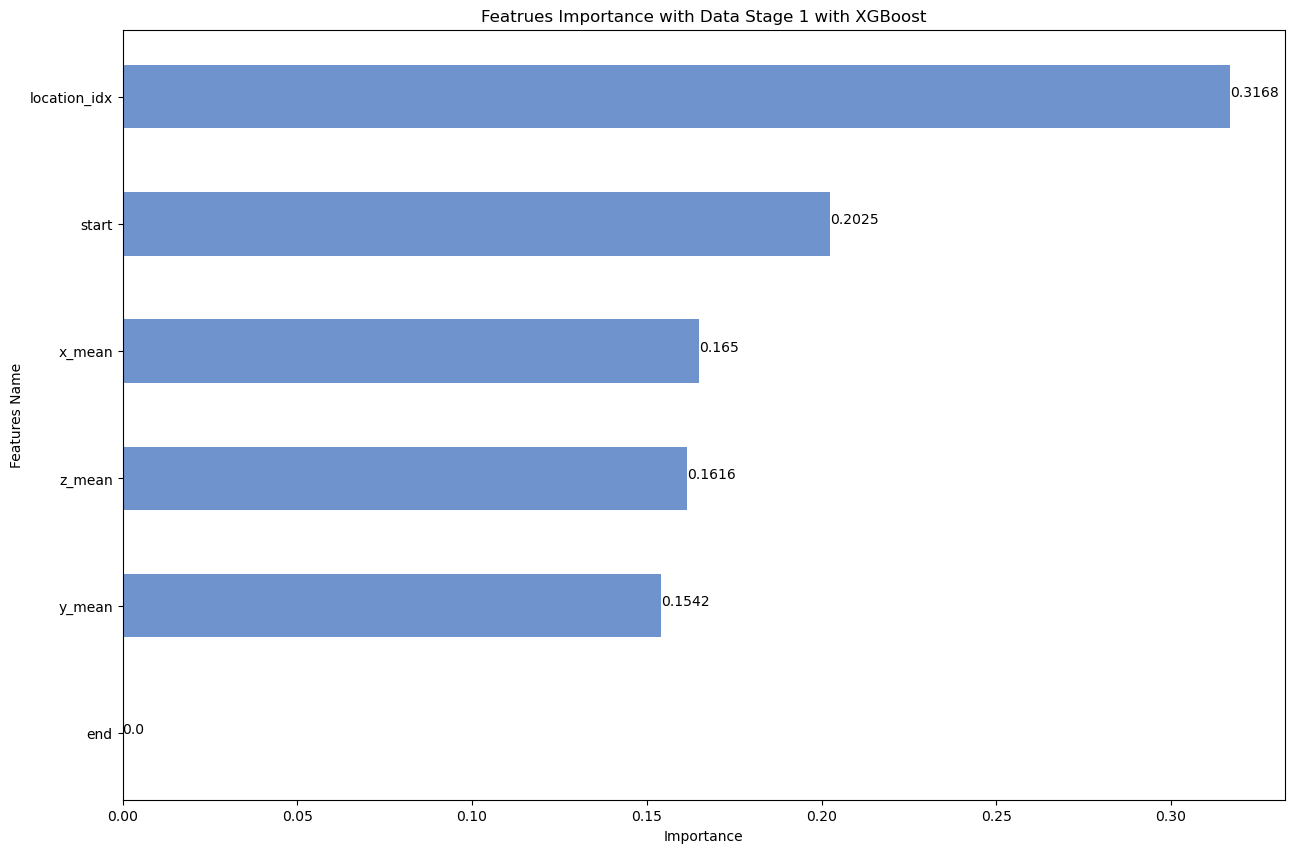

In [4]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15,10))

ax1.barh(importance_df1['features'].tail(10), importance_df1['mean'].tail(10), color='#6f94cd', height=0.5)
ax1.set_ylabel('Features Name')
ax1.set_xlabel('Importance')
ax1.set_title('Featrues Importance with Data Stage 1 with XGBoost')

for index, value in enumerate(importance_df1['mean'].tail(10)):
    ax1.text(value, index, str(round(value, ndigits=4)))

plt.show()

Stage 2

In [5]:
datasets = []
for i in range(1, 11):
    df = pd.read_csv(f'../train/{i:05d}/train_stage2.csv')
    df['target_vector'] = df['target_vector'].apply(ast.literal_eval) 
    
    # target_vector max to 1 other to 0
    def set_max_to_one(target_list):
        max_value = max(target_list)
        return [1 if value == max_value else 0 for value in target_list]
    
    target_df = pd.DataFrame(df['target_vector'].apply(set_max_to_one).tolist(), index=df.index)
    features_df = df.drop(columns=['target_vector'])
    datasets.append((features_df, target_df))
kf = KFold(n_splits=5, shuffle=True, random_state=42)

brier_scores = []
model_importance2 = []

for train_index, test_index in kf.split(datasets):
    X_train = pd.concat([datasets[i][0] for i in train_index], ignore_index=True)
    y_train = pd.concat([datasets[i][1] for i in train_index], ignore_index=True)
    
    X_test = pd.concat([datasets[i][0] for i in test_index], ignore_index=True)
    y_test = pd.concat([datasets[i][1] for i in test_index], ignore_index=True)
    
 
    model = MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    model.fit(X_train, y_train)

    model_importance2.append(estimator.feature_importances_ for estimator in model.estimators_)
    
 
    y_prob = model.predict_proba(X_test)
   
    brier_score = np.mean([brier_score_loss(y_test.iloc[:, c], y_prob[c][:, 1], pos_label=1) for c in range(y_test.shape[1])])
    print(f'brier_score: {brier_score}')
    brier_scores.append(brier_score)

print(f'Stage 2 Average score across all folds: {np.mean(brier_scores)}')

d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`u

brier_score: 0.032959061772107084


d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`u

brier_score: 0.031152815504466032


d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`u

brier_score: 0.030077989740166115


d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`u

brier_score: 0.02677527774608024


d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`u

brier_score: 0.025369553172733893
Stage 2 Average score across all folds: 0.029266939587110675


In [6]:
importance_df2 = pd.DataFrame()

features2 = pd.read_csv('../train/00001/train_stage2.csv').drop('target_vector', axis=1).columns

importance_df2['features'] = features2

counter = 1
for generator in model_importance2:
    for value in generator:
        col_name = 'value' + str(counter)
        importance_df2[col_name] = value
        counter += 1

importance_df2['mean'] = importance_df2.drop('features', axis=1).mean(axis=1)
importance_df2 = importance_df2.sort_values(by='mean')
importance_df2

C:\Users\citrus\AppData\Local\Temp\ipykernel_10796\758550966.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  importance_df2[col_name] = value
C:\Users\citrus\AppData\Local\Temp\ipykernel_10796\758550966.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  importance_df2['mean'] = importance_df2.drop('features', axis=1).mean(axis=1)


,features,value1,value2,value3,value4,value5,value6,value7,value8,value9,...,value92,value93,value94,value95,value96,value97,value98,value99,value100,mean
1,end,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23,3d_shape_mean_depth,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
51,xz_corr,0.004109,0.011301,0.006851,0.007742,0.010626,0.011486,0.013267,0.004772,0.005016,...,0.012256,0.013246,0.013097,0.012732,0.012990,0.015827,0.017240,0.017992,0.017938,0.010937
24,3d_shape_std_width,0.000000,0.002699,0.000000,0.019662,0.013992,0.005111,0.007032,0.008404,0.006302,...,0.016313,0.014964,0.019218,0.013407,0.013443,0.006061,0.021891,0.024522,0.018709,0.011010
52,yz_corr,0.007635,0.010926,0.019907,0.008096,0.009769,0.009509,0.008293,0.004100,0.004156,...,0.013902,0.013781,0.012955,0.010775,0.016833,0.013527,0.015042,0.016504,0.014619,0.011245
25,3d_shape_std_height,0.000000,0.010687,0.023993,0.009039,0.011282,0.009445,0.013960,0.003288,0.004765,...,0.015600,0.016092,0.015728,0.028099,0.006001,0.011178,0.017388,0.013910,0.015247,0.012640
42,y_max_absolute_value,0.003655,0.009963,0.000000,0.023096,0.011788,0.018292,0.012181,0.004145,0.006926,...,0.023048,0.016166,0.011436,0.010024,0.020412,0.018258,0.018461,0.012885,0.018097,0.013053
50,xy_corr,0.011929,0.017943,0.029012,0.014786,0.009720,0.007527,0.013298,0.004693,0.005078,...,0.015487,0.010056,0.013730,0.013623,0.012138,0.018557,0.015958,0.016515,0.016125,0.013237
19,2d_shape_std_width,0.000000,0.027957,0.009832,0.004790,0.017114,0.020848,0.007118,0.003500,0.005742,...,0.015953,0.020424,0.020274,0.048415,0.007520,0.013155,0.027600,0.014069,0.015693,0.013765
39,y_std_dev,0.039219,0.014668,0.015250,0.038738,0.012422,0.012177,0.009094,0.009929,0.008603,...,0.011327,0.023397,0.014430,0.015638,0.022316,0.015238,0.018546,0.024965,0.016548,0.013883


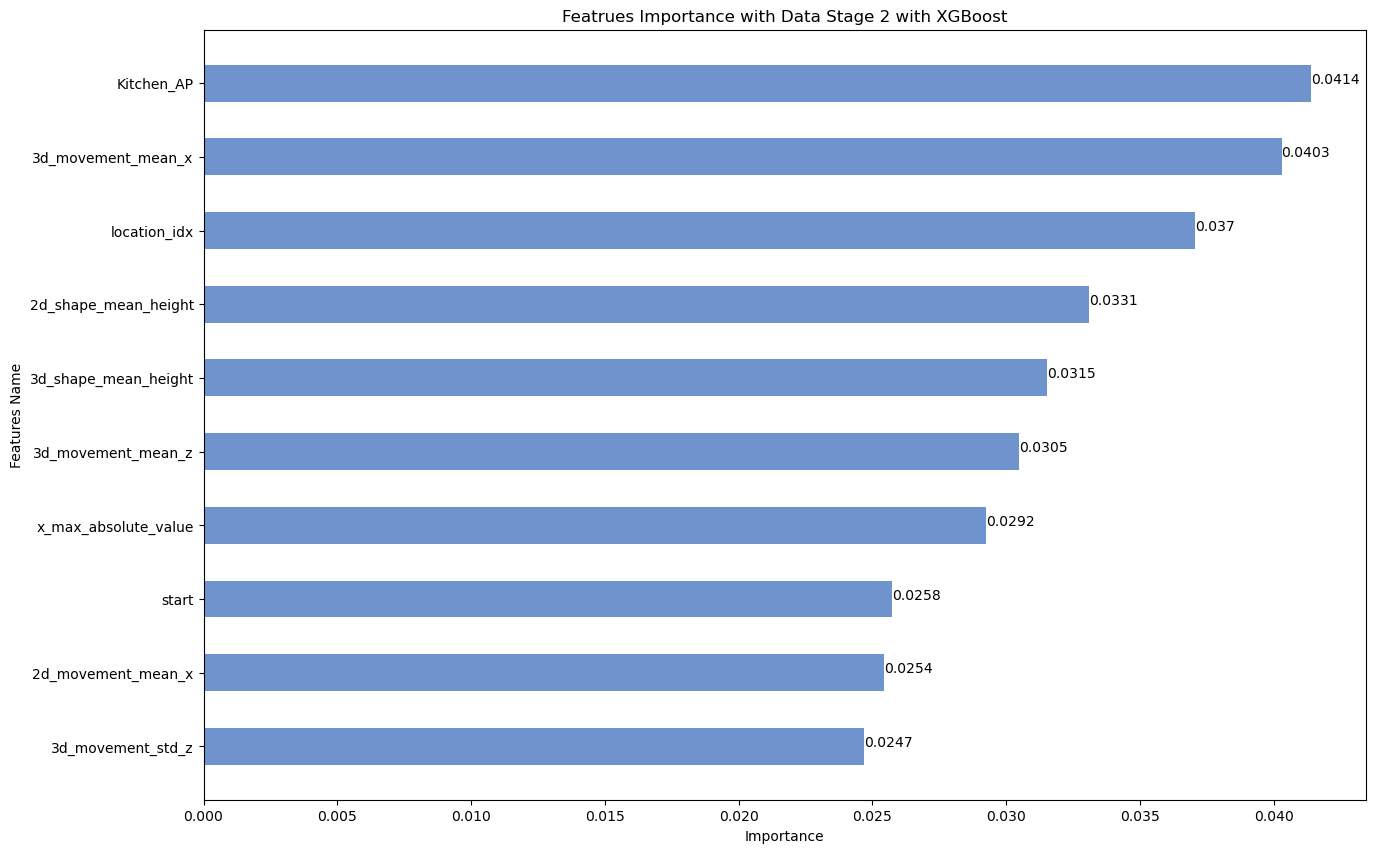

In [7]:
fig, ax1 = plt.subplots(figsize=(15,10))

ax1.barh(importance_df2['features'].tail(10), importance_df2['mean'].tail(10), color='#6f94cd', height=0.5)
ax1.set_ylabel('Features Name')
ax1.set_xlabel('Importance')
ax1.set_title('Featrues Importance with Data Stage 2 with XGBoost')

for index, value in enumerate(importance_df2['mean'].tail(10)):
    ax1.text(value, index, str(round(value, ndigits=4)))

plt.show()

Stage 3

In [8]:
datasets = []
for i in range(1, 11):
    df = pd.read_csv(f'../train/{i:05d}/train_stage3.csv')
    df['target_vector'] = df['target_vector'].apply(ast.literal_eval) 
    
    # target_vector max to 1 other to 0
    def set_max_to_one(target_list):
        max_value = max(target_list)
        return [1 if value == max_value else 0 for value in target_list]
    
    target_df = pd.DataFrame(df['target_vector'].apply(set_max_to_one).tolist(), index=df.index)
    features_df = df.drop(columns=['target_vector'])
    datasets.append((features_df, target_df))
kf = KFold(n_splits=5, shuffle=True, random_state=42)

brier_scores = []
model_importance3 = []

for train_index, test_index in kf.split(datasets):
    X_train = pd.concat([datasets[i][0] for i in train_index], ignore_index=True)
    y_train = pd.concat([datasets[i][1] for i in train_index], ignore_index=True)
    
    X_test = pd.concat([datasets[i][0] for i in test_index], ignore_index=True)
    y_test = pd.concat([datasets[i][1] for i in test_index], ignore_index=True)
    
 
    model = MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    model.fit(X_train, y_train)

    model_importance3.append(estimator.feature_importances_ for estimator in model.estimators_)
    
 
    y_prob = model.predict_proba(X_test)
   
    brier_score = np.mean([brier_score_loss(y_test.iloc[:, c], y_prob[c][:, 1], pos_label=1) for c in range(y_test.shape[1])])
    print(f'brier_score: {brier_score}')
    brier_scores.append(brier_score)

print(f'Stage 3 Average score across all folds: {np.mean(brier_scores)}')

d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`u

brier_score: 0.034909963137997824


d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`u

brier_score: 0.03221073262259237


d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`u

brier_score: 0.02948269439425629


d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`u

brier_score: 0.028094161619865915


d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\anacoda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`u

brier_score: 0.027674115284178798
Stage 3 Average score across all folds: 0.030474333411778236


In [9]:
importance_df3 = pd.DataFrame()

features3 = pd.read_csv('../train/00001/train_stage3.csv').drop('target_vector', axis=1).columns

importance_df3['features'] = features3

counter = 1
for generator in model_importance3:
    for value in generator:
        col_name = 'value' + str(counter)
        importance_df3[col_name] = value
        counter += 1

importance_df3['mean'] = importance_df3.drop('features', axis=1).mean(axis=1)
importance_df3 = importance_df3.sort_values(by='mean')
importance_df3

C:\Users\citrus\AppData\Local\Temp\ipykernel_10796\3256935219.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  importance_df3[col_name] = value
C:\Users\citrus\AppData\Local\Temp\ipykernel_10796\3256935219.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  importance_df3['mean'] = importance_df3.drop('features', axis=1).mean(axis=1)


,features,value1,value2,value3,value4,value5,value6,value7,value8,value9,...,value92,value93,value94,value95,value96,value97,value98,value99,value100,mean
1,end,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
51,yz_corr,0.002347,0.009925,0.013485,0.002444,0.010199,0.008066,0.008421,0.003713,0.004283,...,0.014896,0.014767,0.015663,0.009767,0.014639,0.016165,0.016058,0.014178,0.014406,0.010918
50,xz_corr,0.003436,0.009708,0.024974,0.026425,0.009993,0.009180,0.010874,0.004501,0.005262,...,0.015125,0.013901,0.014376,0.013770,0.013996,0.018680,0.012821,0.021508,0.015928,0.011806
23,3d_shape_std_width,0.033849,0.007662,0.000000,0.004780,0.013273,0.012225,0.003629,0.011130,0.003322,...,0.007869,0.009015,0.036671,0.026892,0.014863,0.012485,0.006500,0.018623,0.015424,0.011927
49,xy_corr,0.006296,0.027587,0.025287,0.003101,0.011088,0.006037,0.012817,0.003952,0.004249,...,0.014969,0.012162,0.011044,0.009889,0.015283,0.018171,0.021954,0.016172,0.014457,0.012083
19,2d_shape_std_width,0.000000,0.003557,0.001122,0.011128,0.015462,0.014337,0.005355,0.011324,0.003832,...,0.012566,0.014273,0.011347,0.025468,0.018557,0.003636,0.012468,0.022441,0.018898,0.012119
24,3d_shape_std_height,0.004398,0.006699,0.004370,0.006950,0.013599,0.010311,0.010420,0.002817,0.005817,...,0.014493,0.013138,0.011647,0.007808,0.015632,0.011837,0.030485,0.022273,0.013322,0.013107
38,y_std_dev,0.005745,0.032238,0.005618,0.036675,0.011810,0.012149,0.010969,0.014456,0.008144,...,0.011024,0.012478,0.018881,0.029558,0.026755,0.014738,0.007926,0.020757,0.016955,0.013380
35,y_average_jerk,0.015032,0.016040,0.003074,0.025610,0.012403,0.015044,0.014311,0.010905,0.007085,...,0.013240,0.011122,0.013657,0.014502,0.025102,0.008768,0.010676,0.017595,0.017718,0.013632
37,y_median,0.005951,0.006140,0.014319,0.012602,0.012481,0.012000,0.018647,0.009897,0.009027,...,0.010758,0.010340,0.015733,0.030966,0.021403,0.021453,0.018517,0.012122,0.020223,0.014247


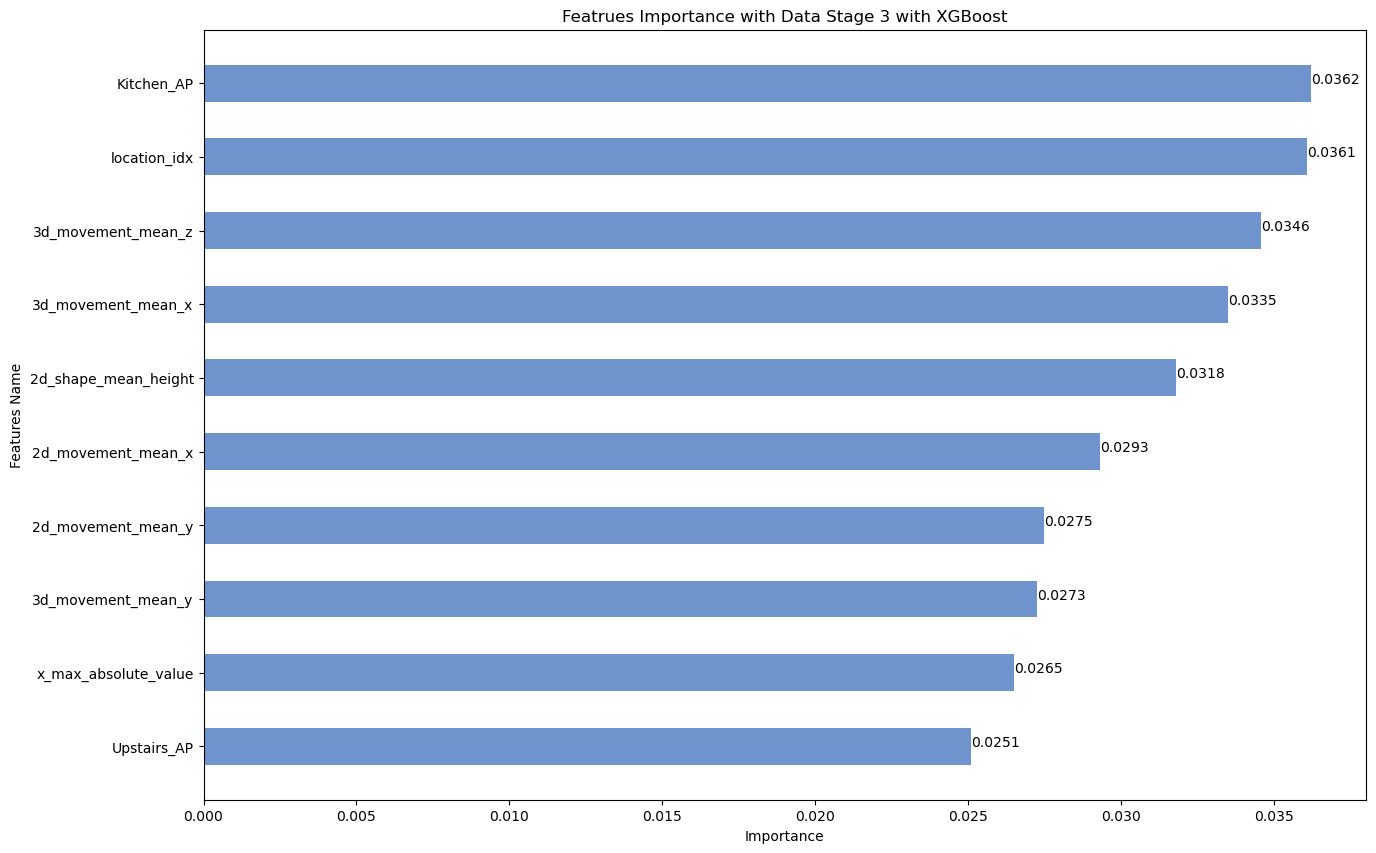

In [10]:
fig, ax1 = plt.subplots(figsize=(15,10))

ax1.barh(importance_df3['features'].tail(10), importance_df3['mean'].tail(10), color='#6f94cd', height=0.5)
ax1.set_ylabel('Features Name')
ax1.set_xlabel('Importance')
ax1.set_title('Featrues Importance with Data Stage 3 with XGBoost')

for index, value in enumerate(importance_df3['mean'].tail(10)):
    ax1.text(value, index, str(round(value, ndigits=4)))

plt.show()